#Sparks Foundation
##Graduate Rotational Internship Program

#Author: Bhargav Sonagara
##Data Science & Business Analytics Tasks

###Task 1:Prediction using Supervised ML

###Statement: Predict the percentage of an student based on the no. of study hours.

Dataset link: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [38]:
#First we imported all the important library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [39]:
#here we reading a csv file using given URL
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(dataset.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [40]:
dataset.isnull().sum() # we have to check whether their is a null values or not

Hours     0
Scores    0
dtype: int64

In [41]:
dataset.corr() #all the values are positively correlated

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


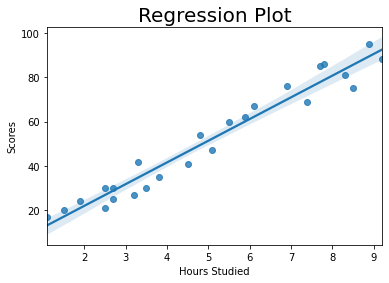

In [42]:
#plotting regression line
import seaborn as sns
sns.regplot(dataset['Hours'], dataset['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Regression Plot', size=20)
plt.show()

## Visualization using Scatter plot

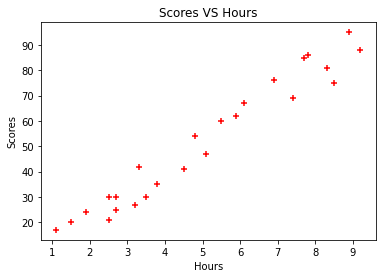

In [43]:
x = dataset.iloc[:,:-1] #x should be a 2d array
y = dataset.iloc[:,1]

plt.scatter(x,y, color='red', marker='+')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores VS Hours')
plt.show()

## Spliting of dataset into testing and training

In [44]:
import sklearn
from sklearn.model_selection import train_test_split #train_test_split is a function that divide a data into training and testing function.

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=1)

#x is a features inside x their is only one feature as hours
#y is labeled means output that we are predict
#test_size means how much data that you have to put in testing remaining goes to training
#random_state means for reproducing same dataset of train and test data. here training and testing data changes again and again

## Create a simple linear model

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #this will create a model y=mx+b
mymodel = model.fit(xtrain, ytrain) 

## Prediction

In [46]:
#our model is create now we have to predict it
ypred = mymodel.predict(xtest)
ypred

array([10.1519013 , 32.73976133, 18.36566858, 86.12924869, 48.14057499,
       77.91548141, 61.48794684])

In [47]:
#comparing hours vs predicted marks
df = pd.DataFrame({'Hours': [i[0] for i in xtest.values], 'Predicted Marks': [k for k in ypred]})
df


,Hours,Predicted Marks
0,1.1,10.151901
1,3.3,32.739761
2,1.9,18.365669
3,8.5,86.129249
4,4.8,48.140575
5,7.7,77.915481
6,6.1,61.487947


In [48]:
#comparing actual marks vs predicted marks
df = pd.DataFrame({'Actual Marks': [i for i in ytest], 'Predicted Marks': [k for k in ypred]})
df

,Actual Marks,Predicted Marks
0,17,10.151901
1,42,32.739761
2,24,18.365669
3,75,86.129249
4,54,48.140575
5,85,77.915481
6,67,61.487947


In [49]:
mymodel.coef_

array([10.26720911])

In [50]:
mymodel.intercept_

-1.1420287231153239

In [51]:
#y = mx+b
y= 10.26720911*11+(-1.1420287231153239)
print(y)

mymodel.predict([[11]])
#here we can see mymodel.predict([[11]]) is same this show how linear regression work

111.79727148688468


array([111.79727146])

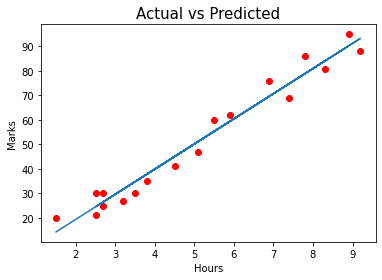

In [52]:
plt.scatter(xtrain, ytrain, color='red')
plt.plot(xtrain, mymodel.predict(xtrain))
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Actual vs Predicted', size=15)
plt.show()

In [54]:
from sklearn import metrics as m
print(m.mean_absolute_error(ytest, ypred))
#using this function it state that the chances of error and wrong prediction by this model is very less

7.3325591780007


In [55]:
#lets predict the score if a student study 8 hours a day
hours = 8
print(mymodel.predict([[hours]]))

[80.99564414]


## Save a Model

In [56]:
#using joblib library we save our model
from sklearn.externals import joblib
joblib.dump(mymodel, 'mymodel_job') #joblib.dump() function will put mymodel in the file mymodel_job
newmodel = joblib.load('mymodel_job') #this will load my model in newmodel

In [57]:
print(newmodel.predict([[9]])) #if a student study 9 hours a day so he/she can score

[91.26285325]
